In [13]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split

import seaborn as sns

sns.set_style('whitegrid')
sns.set_palette('Set2')
sns.color_palette('Set2')
dlsu_green = "#117a65ff"

# Scikitlearn Pipeline

<img src="https://www.tomasbeuzen.com/post/scikit-learn-gridsearch-pipelines/featured_hu078592ed7247fe60b201cf541e7b6db7_204111_720x0_resize_lanczos_3.png">

There are a few key steps that we take prior to building a model. A few of them are: 
    - Feature pre-processing - wherein we prepare our data to be ready for modeling 
    - Feature Selection - selection of features to further simplify our model in the hopes that it will perform better 
    - Model Selection & Hyperparameter tuning - running different machine learning algorithms and hyperparameters to find the optimal model
    
The code that we develop for these can get out of hand especially if we run multiple experiments. To aid us in this, we have the `Pipeline` class from sklearn which allows us to enumerate the steps to be taken from preprocessing to modeling. Using this class helps us maintain our code and simplifies our process further. 

## Create Fake Data

Generate a toy dataset that contains features on height, age, gender wherein the model target is if the person likes pop music or not. We introduce random null values to demonstrate the use of scikitlearn pipeline.

In [14]:
size = 100

data = {"height": np.random.choice(np.arange(150, 200), size),
        "age": np.random.choice(np.arange(20, 50), size),
        "gender": np.random.choice(['male', 'female'], size),
        "likes_pop": np.random.choice([0,1], size)}

toy_data_df = pd.DataFrame(data)
display(toy_data_df.head())

,height,age,gender,likes_pop
0,176,33,male,0
1,151,27,female,1
2,175,33,male,1
3,166,20,male,1
4,177,42,male,1


In [15]:
X = toy_data_df[['height', 'age', 'gender']]
X = X.mask(np.random.random(X.shape) < .3)
y = toy_data_df['likes_pop']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

display(X)

,height,age,gender
0,176.0,33.0,male
1,151.0,27.0,female
2,175.0,33.0,NaN
3,166.0,20.0,male
4,177.0,42.0,NaN
...,...,...,...
95,169.0,NaN,female
96,162.0,NaN,female
97,NaN,NaN,female
98,150.0,24.0,NaN


## Build Pipeline to handle Missing Data & Categorical Values

In [16]:
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

Example of using `SimpleImputer`

In [17]:
np.array(X_train['height']).reshape(-1, 1)

array([[162.],
       [ nan],
       [166.],
       [ nan],
       [181.],
       [175.],
       [191.],
       [175.],
       [ nan],
       [177.],
       [157.],
       [197.],
       [ nan],
       [ nan],
       [176.],
       [ nan],
       [155.],
       [151.],
       [ nan],
       [198.],
       [151.],
       [199.],
       [161.],
       [169.],
       [177.],
       [ nan],
       [170.],
       [183.],
       [157.],
       [188.],
       [160.],
       [158.],
       [176.],
       [ nan],
       [164.],
       [164.],
       [181.],
       [194.],
       [184.],
       [193.],
       [ nan],
       [156.],
       [ nan],
       [196.],
       [159.],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [159.],
       [ nan],
       [190.],
       [191.],
       [ nan],
       [150.],
       [ nan],
       [166.],
       [ nan],
       [ nan],
       [173.],
       [158.],
       [ nan],
       [162.],
       [ nan],
       [159.],
       [153.],
       [16

In [18]:
simp = SimpleImputer(strategy="mean")
simp.fit_transform(np.array(X_train['height']).reshape(-1, 1))

array([[162.        ],
       [172.54545455],
       [166.        ],
       [172.54545455],
       [181.        ],
       [175.        ],
       [191.        ],
       [175.        ],
       [172.54545455],
       [177.        ],
       [157.        ],
       [197.        ],
       [172.54545455],
       [172.54545455],
       [176.        ],
       [172.54545455],
       [155.        ],
       [151.        ],
       [172.54545455],
       [198.        ],
       [151.        ],
       [199.        ],
       [161.        ],
       [169.        ],
       [177.        ],
       [172.54545455],
       [170.        ],
       [183.        ],
       [157.        ],
       [188.        ],
       [160.        ],
       [158.        ],
       [176.        ],
       [172.54545455],
       [164.        ],
       [164.        ],
       [181.        ],
       [194.        ],
       [184.        ],
       [193.        ],
       [172.54545455],
       [156.        ],
       [172.54545455],
       [196

In [19]:
simp = SimpleImputer(strategy="most_frequent")
simp.fit_transform(np.array(X_train['gender']).reshape(-1, 1))

array([['female'],
       ['female'],
       ['male'],
       ['female'],
       ['female'],
       ['female'],
       ['male'],
       ['male'],
       ['male'],
       ['female'],
       ['male'],
       ['male'],
       ['male'],
       ['female'],
       ['male'],
       ['female'],
       ['male'],
       ['female'],
       ['female'],
       ['male'],
       ['female'],
       ['male'],
       ['male'],
       ['female'],
       ['male'],
       ['male'],
       ['female'],
       ['male'],
       ['female'],
       ['male'],
       ['female'],
       ['female'],
       ['male'],
       ['female'],
       ['male'],
       ['male'],
       ['male'],
       ['male'],
       ['male'],
       ['female'],
       ['male'],
       ['female'],
       ['female'],
       ['female'],
       ['male'],
       ['male'],
       ['male'],
       ['female'],
       ['female'],
       ['male'],
       ['male'],
       ['male'],
       ['male'],
       ['female'],
       ['male'],
       ['male'],


In [20]:
numeric_imputer = Pipeline(steps=[
        ('impute', SimpleImputer(strategy="mean"))
])

categorical_imputer = Pipeline(steps=[
        ('impute', SimpleImputer(strategy="most_frequent")),
        ('one-hot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

### Sample of Using the Categorical Imputer on the Toy Dataset

In [21]:
categorical_imputer.fit(X_train[['gender']])
categorical_imputer.transform(X_train[['gender']])

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

The `steps` attribute contains the instances of the preprocessing done. For example, you can access the names of the features returned from the categorical imputer by going through the steps attribute

In [22]:
categorical_imputer.steps[1][1].get_feature_names_out()

array(['x0_female', 'x0_male'], dtype=object)


### Sample of Using the Numeric Imputer on the Toy Dataset

In [23]:
cols = [c for c in X_train.columns if c != 'gender']
numeric_imputer.fit(X_train[cols])
numeric_imputer.transform(X_train[cols])

array([[162.        ,  34.36666667],
       [172.54545455,  29.        ],
       [166.        ,  20.        ],
       [172.54545455,  26.        ],
       [181.        ,  34.36666667],
       [175.        ,  28.        ],
       [191.        ,  34.36666667],
       [175.        ,  31.        ],
       [172.54545455,  48.        ],
       [177.        ,  29.        ],
       [157.        ,  26.        ],
       [197.        ,  33.        ],
       [172.54545455,  38.        ],
       [172.54545455,  30.        ],
       [176.        ,  34.36666667],
       [172.54545455,  41.        ],
       [155.        ,  38.        ],
       [151.        ,  34.36666667],
       [172.54545455,  21.        ],
       [198.        ,  44.        ],
       [151.        ,  27.        ],
       [199.        ,  28.        ],
       [161.        ,  40.        ],
       [169.        ,  34.36666667],
       [177.        ,  42.        ],
       [172.54545455,  48.        ],
       [170.        ,  31.        ],
 

### How do we stitch the 2 together if we have a lot of features?

Sklearn has the `ColumnTransformer` estimator. This estimator allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space. 

In [24]:
from sklearn.compose import ColumnTransformer

numerical_features = X_train.select_dtypes(include='number').columns.tolist()
categorical_features = X_train.select_dtypes(include='object').columns.tolist()

print(numerical_features)
print(categorical_features)

num_cat_imputer = ColumnTransformer(transformers=[
    ('numeric', numeric_imputer, numerical_features),
    ('categorical', categorical_imputer, categorical_features)
])

['height', 'age']
['gender']


In [25]:
num_cat_imputer.fit_transform(X_train)

array([[162.        ,  34.36666667,   1.        ,   0.        ],
       [172.54545455,  29.        ,   1.        ,   0.        ],
       [166.        ,  20.        ,   0.        ,   1.        ],
       [172.54545455,  26.        ,   1.        ,   0.        ],
       [181.        ,  34.36666667,   1.        ,   0.        ],
       [175.        ,  28.        ,   1.        ,   0.        ],
       [191.        ,  34.36666667,   0.        ,   1.        ],
       [175.        ,  31.        ,   0.        ,   1.        ],
       [172.54545455,  48.        ,   0.        ,   1.        ],
       [177.        ,  29.        ,   1.        ,   0.        ],
       [157.        ,  26.        ,   0.        ,   1.        ],
       [197.        ,  33.        ,   0.        ,   1.        ],
       [172.54545455,  38.        ,   0.        ,   1.        ],
       [172.54545455,  30.        ,   1.        ,   0.        ],
       [176.        ,  34.36666667,   0.        ,   1.        ],
       [172.54545455,  41

We can access the different transformers/steps using the `transformers` attribute

In [26]:
num_cat_imputer.transformers

[('numeric', Pipeline(steps=[('impute', SimpleImputer())]), ['height', 'age']),
 ('categorical',
  Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                  ('one-hot',
                   OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
  ['gender'])]

### Building a Pipeline from Preprocessing up to Modeling

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score

log_reg = LogisticRegression()

logreg_pipeline = Pipeline(steps=[
    ('preprocess', num_cat_imputer),
    ('model', log_reg)
])

logreg_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer())]),
                                                  ['height', 'age']),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['gender'])])),
                ('model', LogisticRegression())])

In [28]:
y_pred = logreg_pipeline.predict(X_test)

print(f"Test acc:{logreg_pipeline.score(X_test, y_test)}")
print(f"Test Precision:{precision_score(y_test, y_pred)}")
print(f"Test Recall:{recall_score(y_test, y_pred)}")

Test acc:0.6
Test Precision:0.6666666666666666
Test Recall:0.7692307692307693


### Optimizing the pipeline by including Gridsearch

Since the pipeline attribute provides the score or scoring function we can use our pipeline as part of our gridsearch

In [29]:
from sklearn.model_selection import GridSearchCV

param_dict = {'model__C': [0, 0.1, 0.001, 0.0001, 1],
              'model__penalty': ['l1', 'l2'],
              'model__solver': ['liblinear']}

search = GridSearchCV(logreg_pipeline, param_dict, cv=10)
search.fit(X_train, y_train)

/Users/jimmyyao/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jimmyyao/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jimmyyao/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/jimmyyao/Library/Python/3.9/lib/python/site-packages/sklearn/pipeline.py", line 473, in fit
    self._

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer())]),
                                                                         ['height',
                                                                          'age']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('one-hot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['gender'])])),
                                       ('model', LogisticRegression())]),
             param_grid={'model__C': [0, 0.1, 0.001, 0.0001, 1],
                         'model__penalty': ['l1', 'l2'],
                         'model__solver': ['liblinear']})

In [30]:
result_df = pd.DataFrame.from_dict(search.cv_results_, orient='columns')
result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__penalty,param_model__solver,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003349,0.000584,0.000000,0.000000,0.0000,l1,liblinear,"{'model__C': 0, 'model__penalty': 'l1', 'model...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1,0.002849,0.000117,0.000000,0.000000,0.0000,l2,liblinear,"{'model__C': 0, 'model__penalty': 'l2', 'model...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
2,0.003673,0.000697,0.001743,0.000300,0.1000,l1,liblinear,"{'model__C': 0.1, 'model__penalty': 'l1', 'mod...",0.25,0.5,...,0.500,0.625,0.50,0.625,0.750,0.625,0.375,0.5250,0.134629,3
3,0.003572,0.000702,0.001612,0.000103,0.1000,l2,liblinear,"{'model__C': 0.1, 'model__penalty': 'l2', 'mod...",0.25,0.5,...,0.375,0.750,0.75,0.625,0.750,0.500,0.375,0.5250,0.175000,3
4,0.003155,0.000385,0.001491,0.000044,0.0010,l1,liblinear,"{'model__C': 0.001, 'model__penalty': 'l1', 'm...",0.50,0.5,...,0.500,0.500,0.50,0.500,0.375,0.375,0.375,0.4625,0.057282,7
5,0.003034,0.000168,0.001509,0.000087,0.0010,l2,liblinear,"{'model__C': 0.001, 'model__penalty': 'l2', 'm...",0.50,0.5,...,0.500,0.625,0.50,0.500,0.750,0.500,0.375,0.5250,0.093541,3
6,0.002937,0.000087,0.001475,0.000081,0.0001,l1,liblinear,"{'model__C': 0.0001, 'model__penalty': 'l1', '...",0.50,0.5,...,0.500,0.500,0.50,0.500,0.375,0.375,0.375,0.4625,0.057282,7
7,0.002915,0.000057,0.001441,0.000032,0.0001,l2,liblinear,"{'model__C': 0.0001, 'model__penalty': 'l2', '...",0.50,0.5,...,0.500,0.500,0.50,0.500,0.625,0.625,0.625,0.5375,0.057282,2
8,0.003046,0.000090,0.001452,0.000029,1.0000,l1,liblinear,"{'model__C': 1, 'model__penalty': 'l1', 'model...",0.25,0.5,...,0.500,0.750,0.75,0.625,0.750,0.625,0.375,0.5500,0.169558,1
9,0.003124,0.000242,0.001612,0.000287,1.0000,l2,liblinear,"{'model__C': 1, 'model__penalty': 'l2', 'model...",0.25,0.5,...,0.375,0.625,0.75,0.625,0.750,0.500,0.375,0.5125,0.162500,6


/var/folders/wq/njznmt7x5fz63kwj52c65cr40000gn/T/ipykernel_3435/2529942236.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=result_df, x='param_model__C', y='mean_test_score', hue="param_model__penalty", ci=None)


<Axes: xlabel='param_model__C', ylabel='mean_test_score'>

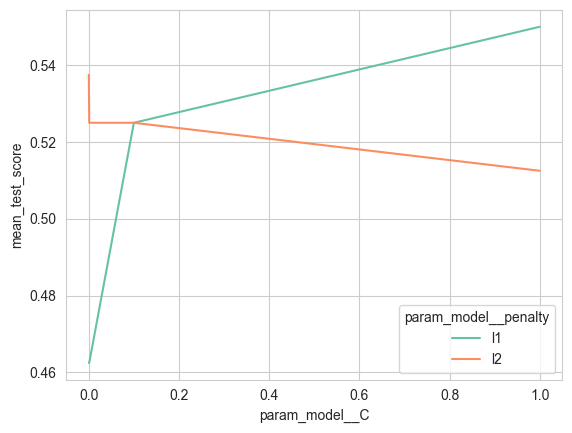

In [31]:
sns.lineplot(data=result_df, x='param_model__C', y='mean_test_score', hue="param_model__penalty", ci=None)

In [32]:
search.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer())]),
                                                  ['height', 'age']),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['gender'])])),
                ('model',
                 LogisticRegression(C=1, penalty='l1', solver='liblinear'))])

In [33]:
y_pred = search.best_estimator_.predict(X_test)

print(f"Test acc:{search.best_estimator_.score(X_test, y_test)}")
print(f"Test Precision:{precision_score(y_test, y_pred)}")
print(f"Test Recall:{recall_score(y_test, y_pred)}")


Test acc:0.6
Test Precision:0.6666666666666666
Test Recall:0.7692307692307693


### Adding more models to the pipeline

In [34]:
from sklearn.ensemble import RandomForestClassifier

param_dict = [
    {
        'classifier': [LogisticRegression()],
        'classifier__C': [0.1, 0.001, 1],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__solver': ['liblinear']     
    },
    {
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': range(100, 200, 25),
        'classifier__max_depth': range(10,50,10),
        'classifier__min_samples_split': np.arange(0.1,.6,.15),
        'classifier__min_samples_leaf': np.arange(0.1,.6,.15),
        'classifier__max_features': np.arange(0.1,.6,.15)
    }
]

pipeline = Pipeline(steps=[
    ('preprocess', num_cat_imputer),
    ('classifier', LogisticRegression())
])

search = GridSearchCV(pipeline, param_dict, cv=10, verbose=0)
search.fit(X_train, y_train)


/Users/jimmyyao/Library/Python/3.9/lib/python/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer())]),
                                                                         ['height',
                                                                          'age']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('one-hot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['gender'])])),
                                       ('classifier', L...
                          'classifier__penalty': ['l1', 'l2'],
                          'classifier__solver': ['liblinear']},
                         {'classifier': [RandomForestClassifier()],
                          'classifier__max_depth': range(10, 50, 10),
                          'classifier__max_features': array([0.1 , 0.25, 0.4 , 0.55]),
                          'classifier__min_samples_leaf': array([0.1 , 0.25, 0.4 , 0.55]),
                          'classifier__min_samples_split': array([0.1 , 0.25, 0.4 , 0.55]),
                          'classifier__n_estimators': range(100, 200, 25)}])

In [35]:
result_df = pd.DataFrame.from_dict(search.cv_results_, orient='columns')
result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__C,param_classifier__penalty,param_classifier__solver,param_classifier__max_depth,param_classifier__max_features,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005134,0.001900,0.002319,0.000686,LogisticRegression(),0.100,l1,liblinear,NaN,NaN,...,0.500,0.625,0.50,0.625,0.750,0.625,0.375,0.5250,0.134629,618
1,0.002992,0.000131,0.001481,0.000063,LogisticRegression(),0.100,l2,liblinear,NaN,NaN,...,0.375,0.750,0.75,0.625,0.750,0.500,0.375,0.5250,0.175000,618
2,0.002947,0.000147,0.001445,0.000040,LogisticRegression(),0.001,l1,liblinear,NaN,NaN,...,0.500,0.500,0.50,0.500,0.375,0.375,0.375,0.4625,0.057282,943
3,0.003085,0.000219,0.001489,0.000062,LogisticRegression(),0.001,l2,liblinear,NaN,NaN,...,0.500,0.625,0.50,0.500,0.750,0.500,0.375,0.5250,0.093541,618
4,0.003611,0.000651,0.001708,0.000223,LogisticRegression(),1.000,l1,liblinear,NaN,NaN,...,0.500,0.750,0.75,0.625,0.750,0.625,0.375,0.5500,0.169558,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,0.078656,0.000254,0.004442,0.000128,RandomForestClassifier(),NaN,NaN,NaN,40.0,0.55,...,0.500,0.500,0.50,0.500,0.625,0.625,0.625,0.5375,0.057282,5
1026,0.046204,0.000266,0.003273,0.000118,RandomForestClassifier(),NaN,NaN,NaN,40.0,0.55,...,0.500,0.500,0.50,0.500,0.625,0.625,0.625,0.5375,0.057282,5
1027,0.057056,0.000319,0.003637,0.000126,RandomForestClassifier(),NaN,NaN,NaN,40.0,0.55,...,0.500,0.500,0.50,0.500,0.625,0.625,0.625,0.5375,0.057282,5
1028,0.068035,0.000251,0.003981,0.000068,RandomForestClassifier(),NaN,NaN,NaN,40.0,0.55,...,0.500,0.500,0.50,0.500,0.625,0.625,0.625,0.5375,0.057282,5


In [36]:
result_df.param_classifier.unique()[1]

RandomForestClassifier()

<Axes: xlabel='param_classifier', ylabel='mean_test_score'>

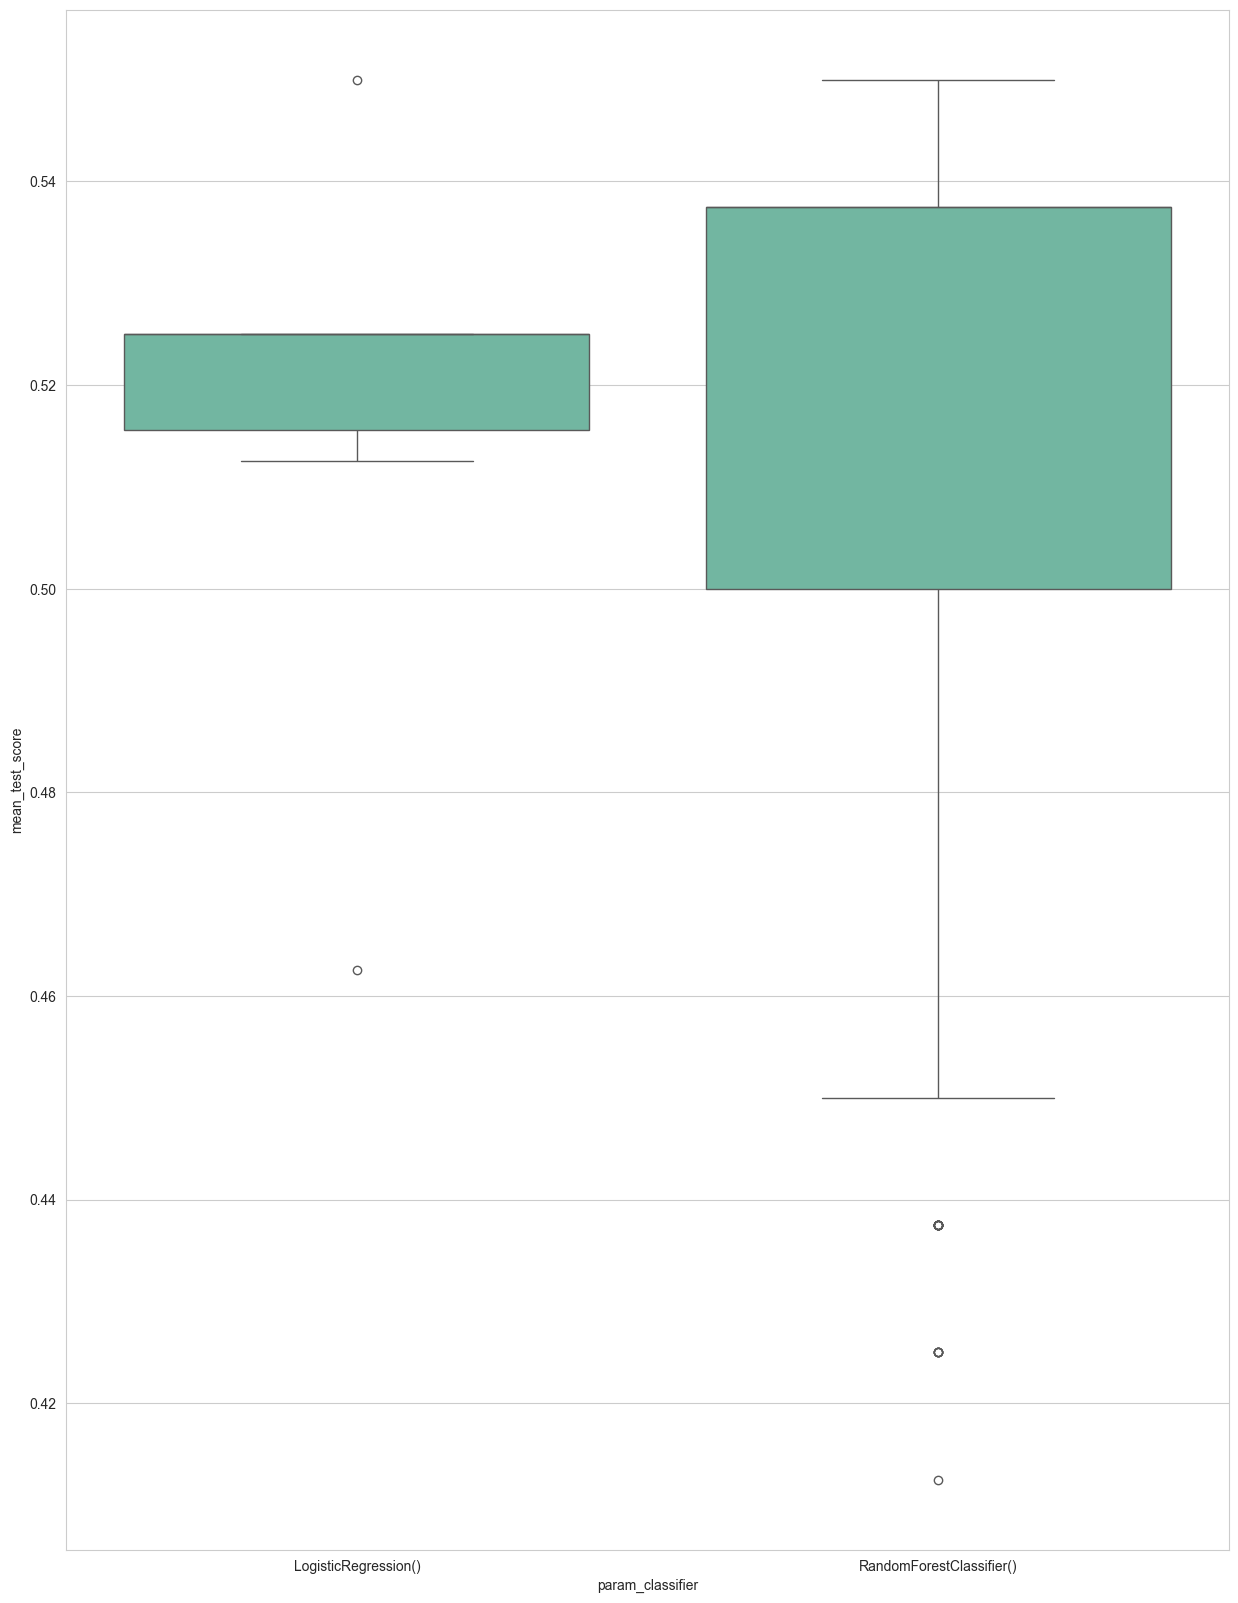

In [37]:
import matplotlib.pyplot as plt
ax, fig = plt.subplots(figsize=(15,20))
sns.boxplot(data=result_df, x="param_classifier", y="mean_test_score")

In [38]:
result_df.param_classifier.unique()[1]

RandomForestClassifier()

/var/folders/wq/njznmt7x5fz63kwj52c65cr40000gn/T/ipykernel_3435/2336808434.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=result_df[result_df.param_classifier == result_df.param_classifier.unique()[1]],
/var/folders/wq/njznmt7x5fz63kwj52c65cr40000gn/T/ipykernel_3435/2336808434.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=result_df[result_df.param_classifier == result_df.param_classifier.unique()[1]],


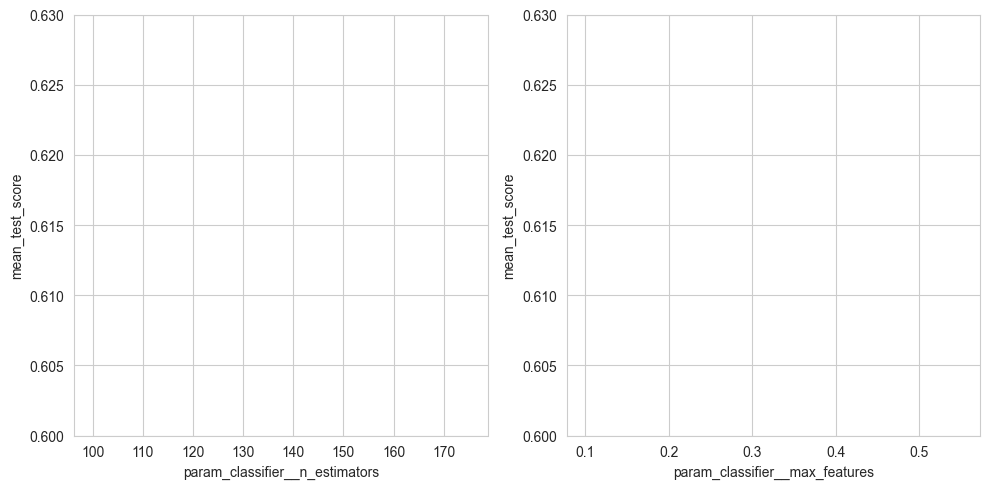

In [39]:
fig, axes = plt.subplots(figsize=(10,5), ncols=2)
sns.lineplot(data=result_df[result_df.param_classifier == result_df.param_classifier.unique()[1]], 
            x="param_classifier__n_estimators", y="mean_test_score", ci=None, ax=axes[0])

sns.lineplot(data=result_df[result_df.param_classifier == result_df.param_classifier.unique()[1]], 
            x="param_classifier__max_features", y="mean_test_score", ci=None, ax=axes[1])

axes[0].set_ylim(0.6, 0.63)
axes[1].set_ylim(0.6, 0.63)

plt.tight_layout()

In [40]:
search.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer())]),
                                                  ['height', 'age']),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['gender'])])),
                ('classifier',
                 LogisticRegression(C=1, penalty='l1', solver='liblinear'))])

In [41]:
search.best_estimator_.steps[1][1].predict(search.best_estimator_.steps[0][1].transform(X_train))

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1])

In [42]:
import shap
explainer = shap.TreeExplainer(search.best_estimator_.steps[1][1], 
                               search.best_estimator_.steps[0][1].transform(X_train),
                               feature_perturbation='interventional',
                               model_output='probability')
shap_values = explainer.shap_values(search.best_estimator_.steps[0][1].transform(X_test))

ModuleNotFoundError: No module named 'shap'

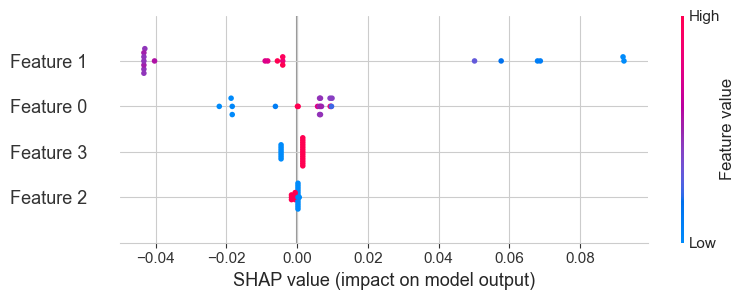

In [ ]:
shap.summary_plot(shap_values[:,:,0], search.best_estimator_.steps[0][1].transform(X_test))

## Group Activity (run the code below)

In your groups, build a pipeline using sklearn that cleans the titanic dataset and creates a model that classifies if a passenger survives or dies. 

Prior to building the pipeline drop the following columns:
- PassengerId 
- Cabin (77% of data points are missing) 
- Name <br>

For age impute the missing data by getting the average while for embarked get the most frequent value. 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

In [ ]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

In [ ]:
titanic_df.isnull().sum()/titanic_df.shape[0]

In [ ]:
titanic_model_data = titanic_df.drop(['PassengerId', 'Cabin', 'Name'], axis=1)

X = titanic_model_data.drop('Survived', axis=1)
y = titanic_model_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [ ]:
numeric_imputer = Pipeline(steps=[
        ('impute', SimpleImputer(strategy="mean"))
])

categorical_imputer = Pipeline(steps=[
        ('impute', SimpleImputer(strategy="most_frequent")),
        ('one-hot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

numerical_features = X_train.select_dtypes(include='number').columns.tolist()
categorical_features = X_train.select_dtypes(include='object').columns.tolist()

print(numerical_features)
print(categorical_features)

num_cat_imputer = ColumnTransformer(transformers=[
    ('numeric', numeric_imputer, numerical_features),
    ('categorical', categorical_imputer, categorical_features)
])

log_reg = LogisticRegression()

logreg_pipeline = Pipeline(steps=[
    ('preprocess', num_cat_imputer),
    ('model', log_reg)
])

param_dict = {'model__C': [0, 0.1, 0.001, 0.0001, 1],
              'model__penalty': ['l1', 'l2'],
              'model__solver': ['liblinear']}

search = GridSearchCV(logreg_pipeline, param_dict, cv=10)
search.fit(X_train, y_train)



In [ ]:
search.best_estimator_.steps[0][1].transform(X_train[:10])

In [ ]:
import shap
explainer = shap.KernelExplainer(search.best_estimator_.steps[1][1].predict_proba, 
                               search.best_estimator_.steps[0][1].transform(X_train[:10]))
shap_values = explainer.shap_values(search.best_estimator_.steps[0][1].transform(X_test))
shap.summary_plot(shap_values[0], search.best_estimator_.steps[0][1].transform(X_test))

In [ ]:
y_pred = search.best_estimator_.predict(X_test)

print(f"Test acc:{search.best_estimator_.score(X_test, y_test)}")
print(f"Test Precision:{precision_score(y_test, y_pred)}")
print(f"Test Recall:{recall_score(y_test, y_pred)}")